## En este notebook haremos el pre-procesamiento de la data para nuestro modelo. También intentaremos hacer un poco de feature engineering

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('data_para_preprocessing_con_gh.csv')
pd.set_option('display.max_columns',None)

In [3]:
df

,Antiguedad,Anunciante,Balneario,NroBanios,Nro_pisos,Cocheras,Dormitorios,Estado de Inmueble,Luminosidad,Mascotas,Precio,Tipo,TipoCochera,Uso_comercial,Uso_profesional,latitud,longitud,Area_constr_m2,Area_total_m2,'Cuarto de servicio','Deposito','Terraza','Kitchenette','Sala de estar','Sotano','Patio','anx81tico','Comedor diario','Comedor','Banio de servicio','Jardanxadn Interno','Walking Closet','Escritorio','Cocina','Banio independiente','Lavanderanxada','Balcon','Sala','Closet','Banio de visitas','Agua','Guardiananxada','Internet','Luz','Cable','Servicio de Limpieza','Conexion a gas','Sistema de seguridad','Telefono','Areadeportiva','Piscina','Solarium','Sala de internet','Sala de cine','Jardanxadn','Parque interno','Guarderanxada','anx81reas verdes','Club House','Hall de ingreso','Areade BBQ','Gimnasio','Areade sauna','Juegos para ninios','Ingreso independiente','Colegios cercanos','Cerca al mar','Centros comerciales cercanos','Parques cercanos','Acceso personas discapacidad','Frente al mar','Desagaue','Jacuzzi','Chimenea','Intercomunicador','Cerco Electrico','Parrilla','Aire acondicionado','Amoblado','Sauna','Calefaccion','Equipado','Terma','Portero electrico','Cocina con reposteros',Distrito,Provincia,geohash_grado6,geohash_grado5,geohash_grado7,geohash_grado8
0,5.0,Valentinoinmobiliaria,Nulo,4.0,2.0,3.0,3,Excelente,Muy luminoso,Si,885000.0,Casa,Paralelas,No,NoEspecifica,-12.077232,-76.929494,450.0,600.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LaMolina,Lima,6mc733,6mc73,6mc733m,6mc733mt
1,5.0,No disponible,Nulo,5.0,3.0,1.0,5+,Excelente,Muy luminoso,Si,150000.0,Casa,NoEspecifica,Si,Si,-12.005022,-76.872657,350.0,183.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lurigancho,Lima,6mc7dw,6mc7d,6mc7dwx,6mc7dwx1
2,3.0,No disponible,Nulo,5.0,3.0,4.0,4,Excelente,Muy luminoso,Si,1950000.0,Casa,Paralelas,NoEspecifica,NoEspecifica,-12.065150,-76.910620,625.0,1518.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,LaMolina,Lima,6mc73g,6mc73,6mc73ge,6mc73ge7
3,1.0,No disponible,Sol Y Mar,5.0,2.0,3.0,4,Excelente,Muy luminoso,Si,380000.0,Casa de Playa,Paralelas,NoEspecifica,NoEspecifica,-12.841678,-76.526003,150.0,150.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Asia,Lima,6m9wfw,6m9wf,6m9wfw5,6m9wfw5r
4,4.0,No disponible,Nulo,4.0,2.0,2.0,5+,Muy bueno,Muy luminoso,Si,590000.0,Casa,Lineales,NoEspecifica,NoEspecifica,-12.113779,-76.972217,290.0,344.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Santiago

Hay columnas que no podemos usar para la predicción en sí por ahora, por eso, procederemos a deshacernos de ellas. Las columnas involucradas son: 'Unnamed:0','Unnamed:0.1','descripcion','Direccion','Fecha_pub','Ubicacion','SinNombre','Area_constr','Area_total','match'

In [2]:
cols_to_drop = ['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1','Descripcion','Direccion','Fecha_pub','Ubicacion','Area_constr','Area_total','match']
df.drop(cols_to_drop,axis=1,inplace=True)

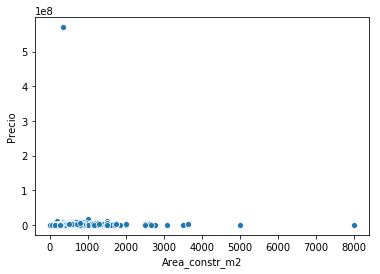

In [32]:
sns.scatterplot(y='Precio',x='Area_constr_m2',data=df)

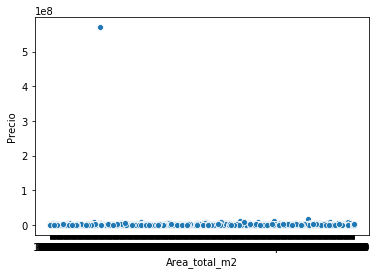

In [34]:
sns.scatterplot(y='Precio',x='Area_total_m2',data=df)

Ahora, como sabemos, tenemos data numérica y categórica. Proceremos a separar este tipo de data y hacer el encoding.

In [3]:
object_cols = [col for col in df.columns if df[col].dtype == 'object']
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']

### Anotaciones:

Ahora que tenemos nuestra data relativamente lista para el modelo, podemos agregar variables a nuestro modelo. Antes de hacer esto cabe destacar que **ya hemos hecho el feature_importance pero con un modelo de Arboles de decisión.** Con esto hemos tenido algunas sorpresas, como: 

- La variable Nro_pisos no es tan importante como para predecir el precio de la casa...

- El Geohash de grado 8 es el más preciso para explicar el precio... 

- Luego sigue el area construida y el area total, incluyendo Distrito y la variable latitud de por sí...

Entonces, nos podemos preguntar: 

- ¿Podemos agregar más data que nos ayude a mejorar nuestro modelo? 

- ¿Qué tal si medimos distancias a parámetros que creemos importantes para el precio de las casas?

- ¿El modelo mejoraría si eliminamos las variables más importantes, y si reducimos dimensiones?

- ¿Qué pasaría si clusterizamos nuestra data numérica? 

- ¿Podemos sacar logaritmos si la distibución es la correcta? 


##### Análisis exploratorio de las variables numéricas

C:\Users\pablo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


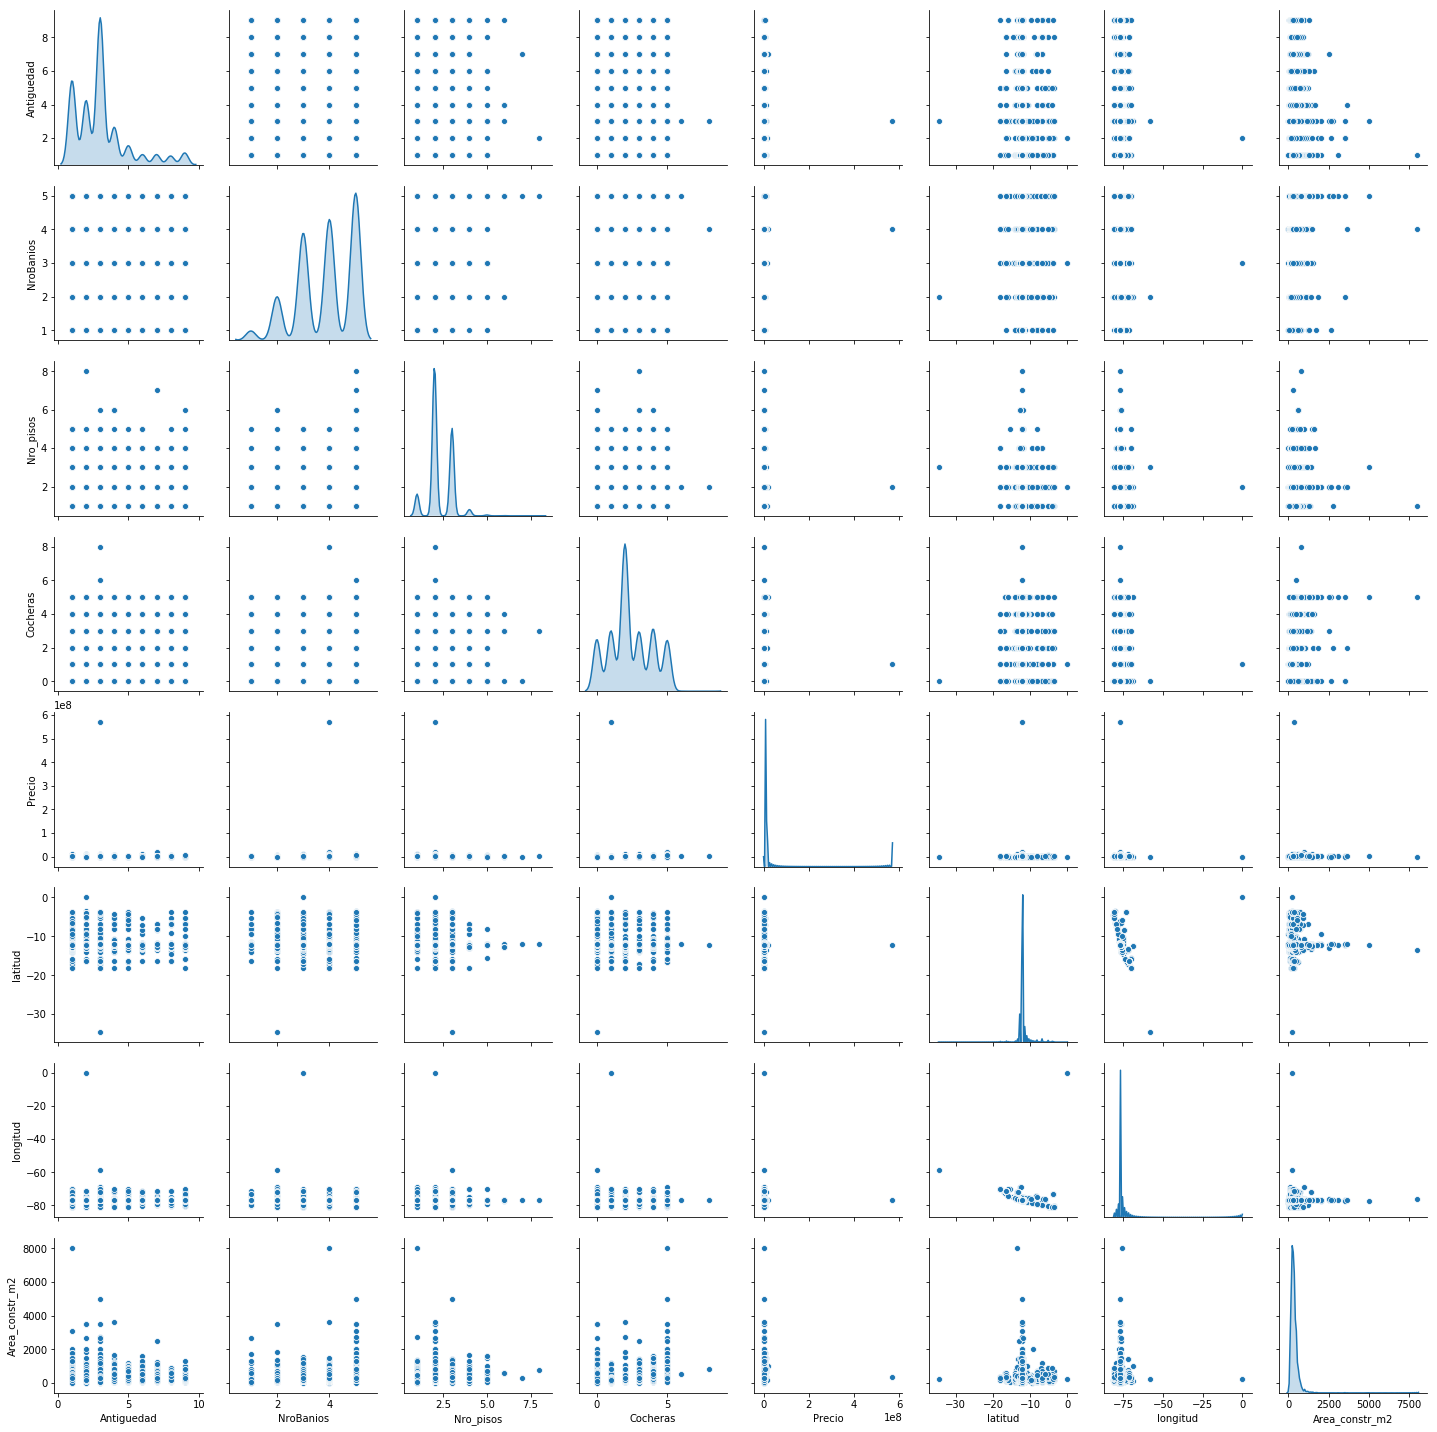

In [5]:
sns.pairplot(df, x_vars = numeric_cols, y_vars = numeric_cols, diag_kind = 'kde')

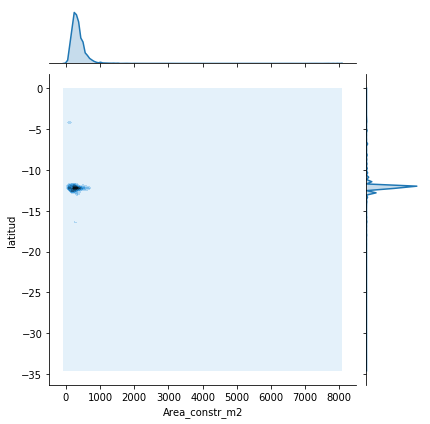

In [6]:
#sns.jointplot(data= df, x = 'Area_constr_m2', y = 'latitud',kind='kde')

En este caso usaremos una función encontrada en Kaggle. Personalmente, he buscado varias opciones para hacer el target encoding pero este kernel es el que nos da de manera más completa el output. También, he optado por elegir el método smooth del target encoding, es decir, usar el método de forma que no caiga en tanto riesgo de overfitting. Esto tiene varias variantes pero por ahora usaré el smooth (que le da peso a la media total del target) 

- Fuente Kaggle: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features

- Fuente teórica: https://maxhalford.github.io/blog/target-encoding-done-the-right-way/

In [4]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

Usaremos las funciones importadas, pero esto requiere que hagamos un train y test antes poder invocar a la función. 

In [5]:
X = df.drop('Precio',axis=1)
Y = df['Precio']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y) #Acá dividimos la data

train = df.loc[X_train.index]
test = df.loc[X_test.index]

In [9]:
#Aplicando la función para el target_encode para todas las columnas que quiera. 
trn, sub = target_encode(train['Distrito'],
                         test['Distrito'],
                         target = train.Precio,
                         min_samples_leaf = 10,
                         smoothing = 5,
                         noise_level=0.01)

In [10]:
for obj_col in object_cols:
    temp_trn, temp_sub = target_encode(train[obj_col],
                                       test[obj_col],
                                       target = train.Precio,
                                       min_samples_leaf = 10,
                                       smoothing = 5,
                                       noise_level = 0.01)
    train[obj_col] = temp_trn
    test[obj_col] = temp_sub

In [11]:
X_train = train.drop('Precio',axis=1)
X_test = test.drop('Precio',axis=1)
y_train = train.Precio
y_test = test.Precio

### Ahora que ya hice mi encoding armaremos un pequeño modelo.

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [13]:
params = {'n_estimators' : [250], 'criterion' : ['mse','mae','friedman_mse']}

In [21]:
rf_r_2= RandomForestRegressor(n_jobs=-1,n_estimators=300,criterion='mse')

rf_r_2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [19]:
rf_r.score(X_test,y_test) #Criterio default, 100 estimadores

-0.0008012913764894325

In [22]:
rf_r_2.score(X_test,y_test) #crit default, 300 estimadores

-0.0007462795188106774

In [14]:
dt_r.score(X_test,y_test) #Arbol de decision

0.26287317153278933

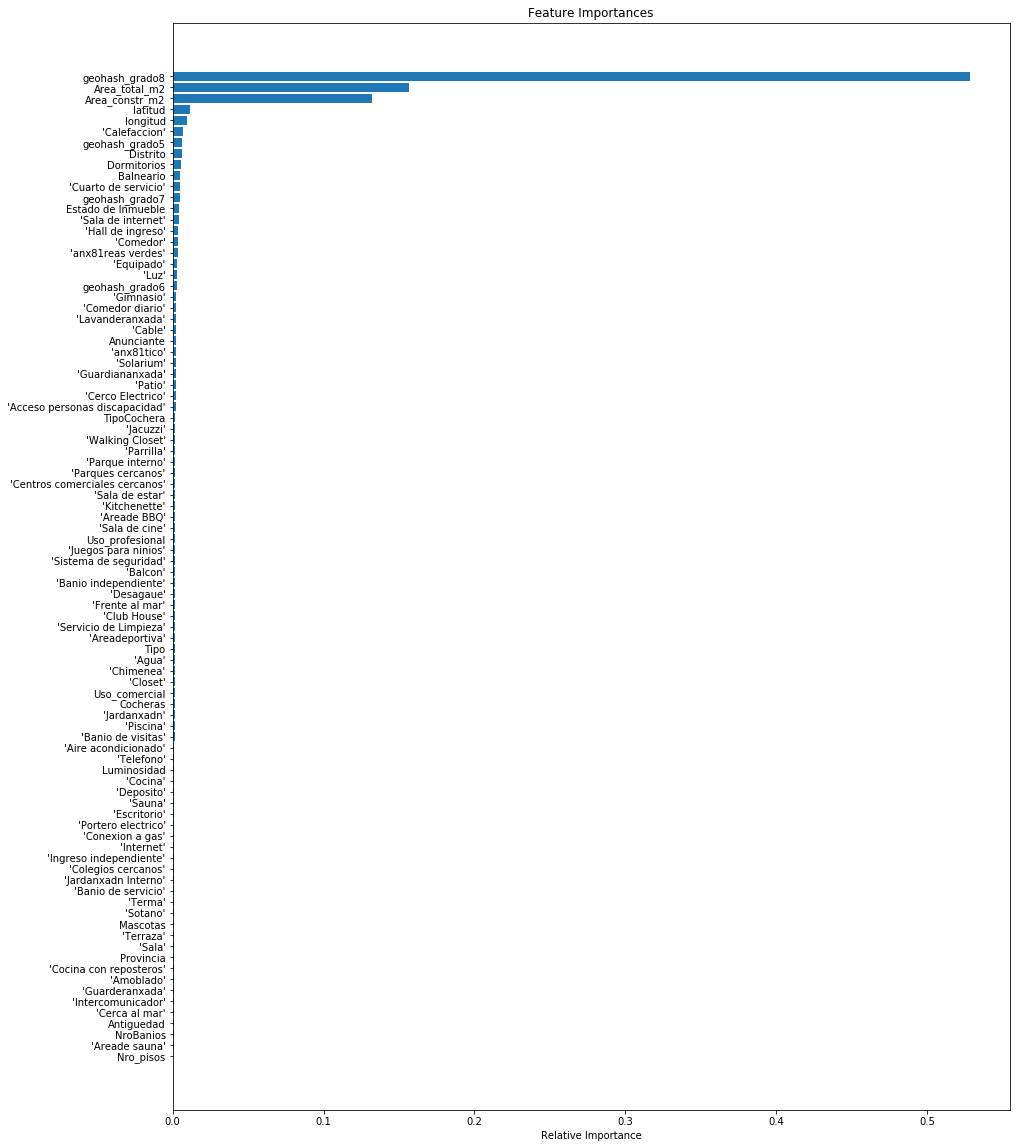

In [18]:
importances = rf_r.feature_importances_
cols = X_train.columns
plt.figure(figsize=(15,20))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align = 'center')
plt.yticks(range(len(indices)),[cols[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

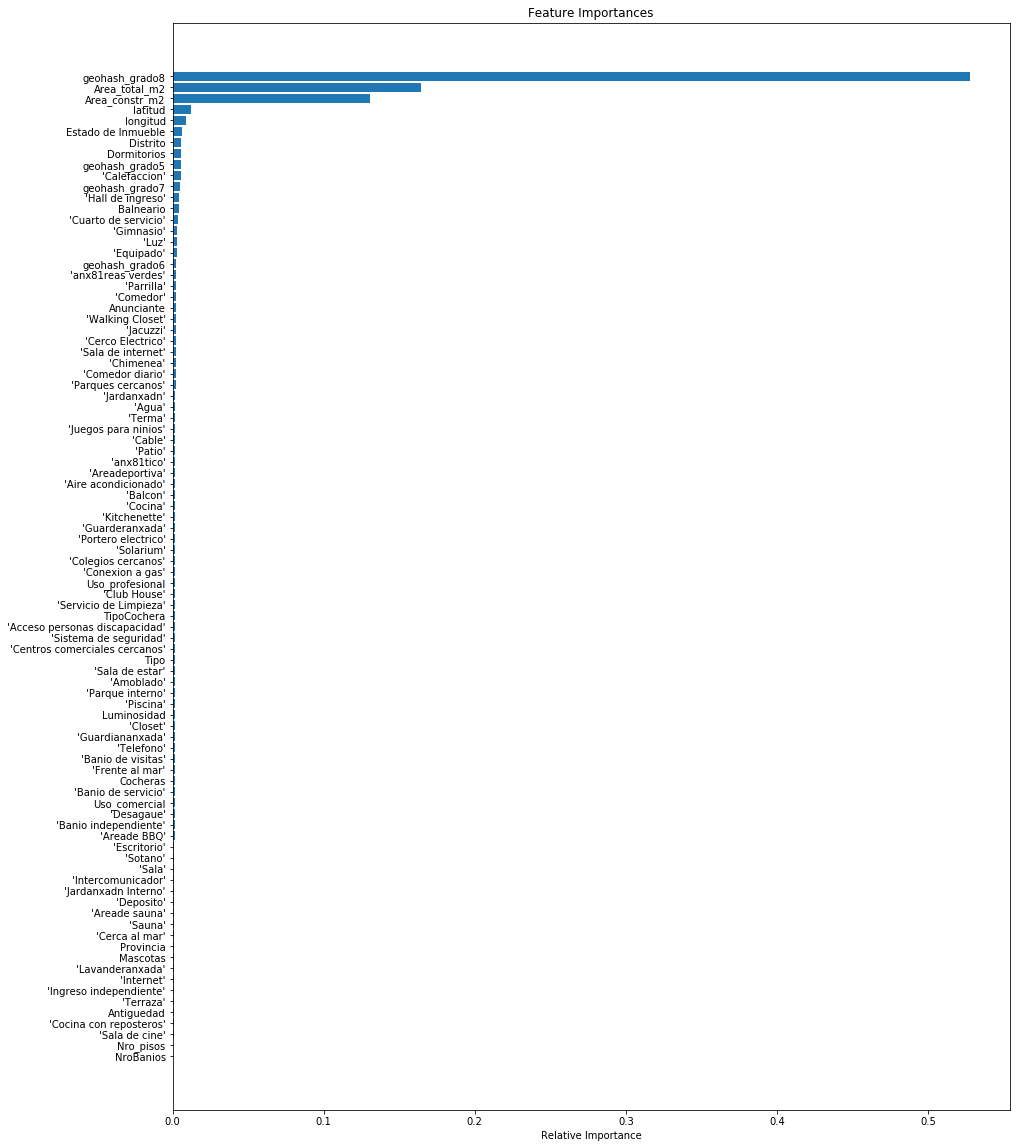

In [23]:
importances = rf_r_2.feature_importances_
cols = X_train.columns
plt.figure(figsize=(15,20))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align = 'center')
plt.yticks(range(len(indices)),[cols[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [25]:
X_train_2 = X_train.drop(['longitud','latitud'],axis=1)
rf_r_2.fit(X_train_2,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [26]:
X_test_2 = X_test.drop(['longitud','latitud'],axis=1)
rf_r_2.score(X_test_2,y_test)

-0.0007825206973923748

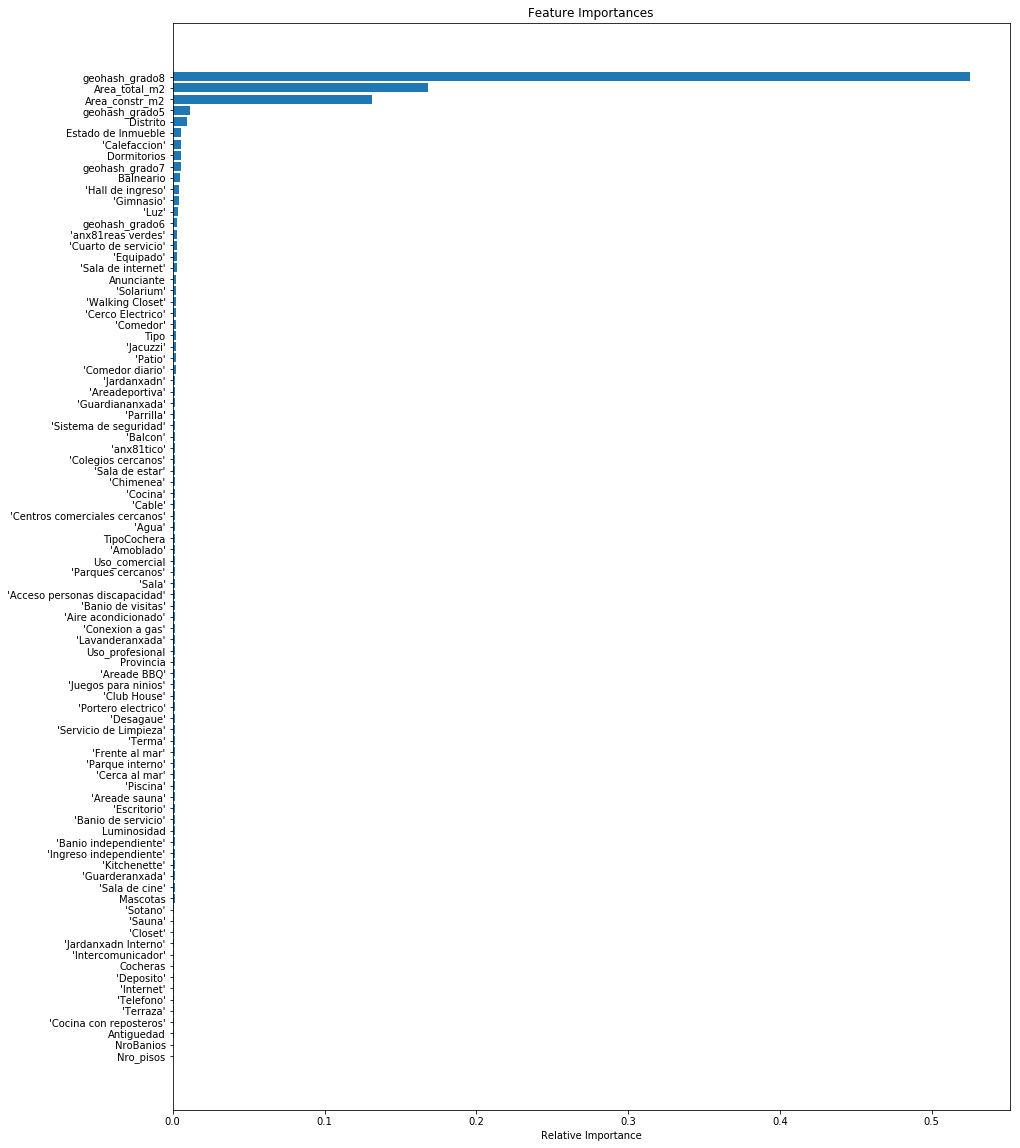

In [28]:
importances = rf_r_2.feature_importances_
cols = X_train_2.columns
plt.figure(figsize=(15,20))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align = 'center')
plt.yticks(range(len(indices)),[cols[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Veremos ahora la matriz de correlación de nuestra data:

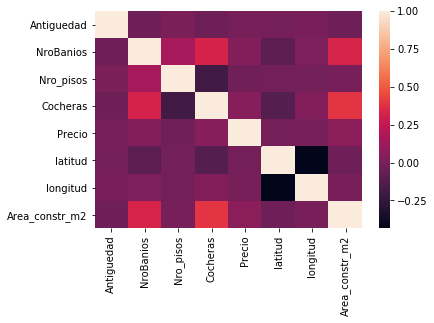

In [6]:
data_corr = df.corr()
sns.heatmap(data_corr)